# Matplotlib Advanced Stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(0, 5, 6)
y = x ** 2

**Logarithmic scale**

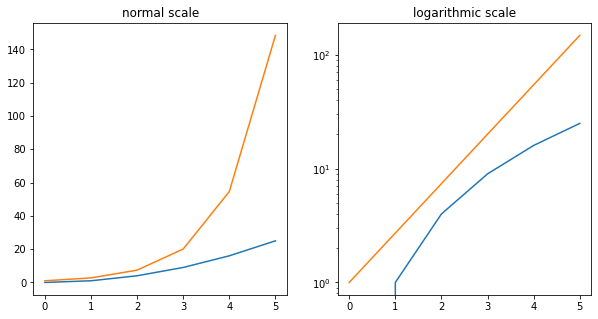

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(x, y)
axes[0].plot(x, np.exp(x))
axes[0].set_title("normal scale")

axes[1].plot(x, y)
axes[1].plot(x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title('logarithmic scale')

plt.show()

**placement of ticks and costum tick labels**

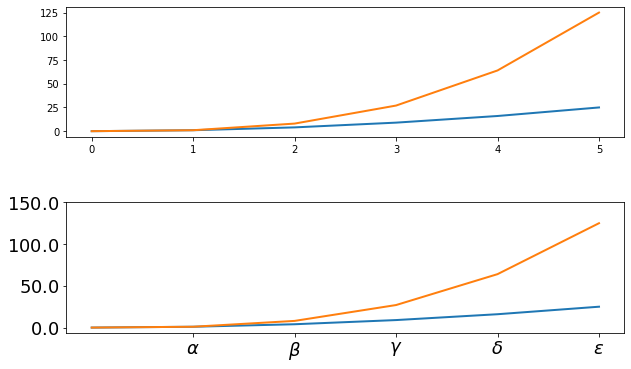

In [23]:
fig, axes = plt.subplots(figsize=(10, 6), nrows=2, ncols=1)

axes[0].plot(x, x**2, lw=2)
axes[0].plot(x, x**3, lw=2)

axes[1].plot(x, x**2, lw=2)
axes[1].plot(x, x**3, lw=2)

axes[1].set_xticks([1, 2, 3, 4, 5])
axes[1].set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks= [0, 50, 100, 150]
axes[1].set_yticks(yticks)
axes[1].set_yticklabels([f"${y:.1f}$" for y in yticks], fontsize=18)

fig.subplots_adjust(hspace=0.5)

plt.show()

**grid**

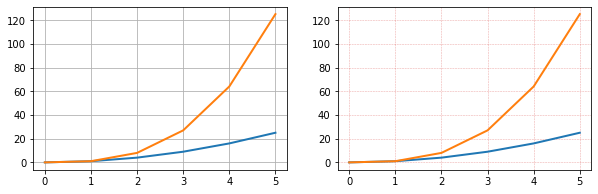

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].plot(x, x**2, lw=2)
axes[0].plot(x, x**3, lw=2)
axes[0].grid(True)

axes[1].plot(x, x**2, lw=2)
axes[1].plot(x, x**3, lw=2)
axes[1].grid(color='#d94c48', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.show()

**axis spines**

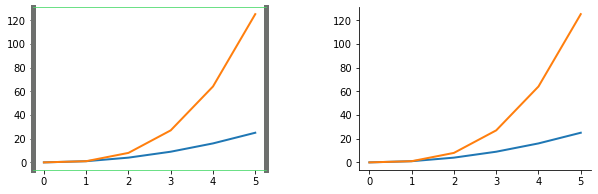

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].plot(x, x**2, lw=2)
axes[0].plot(x, x**3, lw=2)
axes[0].spines['bottom'].set_color('#48d969')
axes[0].spines['top'].set_color('#48d969')
axes[0].spines['left'].set_color('#6e706e')
axes[0].spines['left'].set_linewidth(5)
axes[0].spines['right'].set_color('#6e706e')
axes[0].spines['right'].set_linewidth(5)

axes[1].plot(x, x**2, lw=2)
axes[1].plot(x, x**3, lw=2)
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')

fig.subplots_adjust(wspace=0.4)

plt.show()

**twin axes**

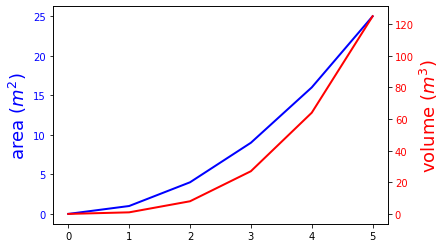

In [28]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

**zero startpoint**

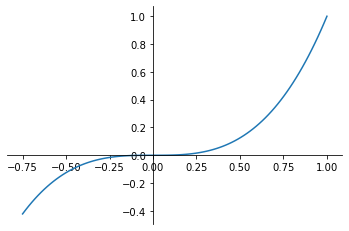

In [29]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

**other plottypes**

In [30]:
n = np.array([0,1,2,3,4,5])

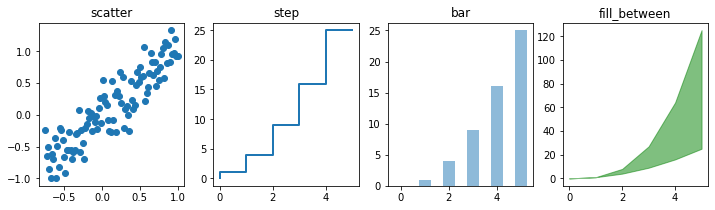

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

**text annotations**

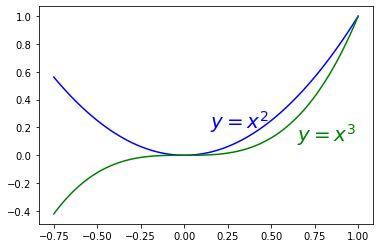

In [33]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, color="blue")
ax.plot(xx, xx**3, color="green")

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

**subplots to grid**

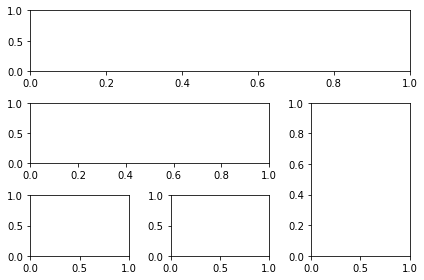

In [34]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

**3D**

In [36]:
# data
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [37]:
# data
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

In [39]:
import matplotlib

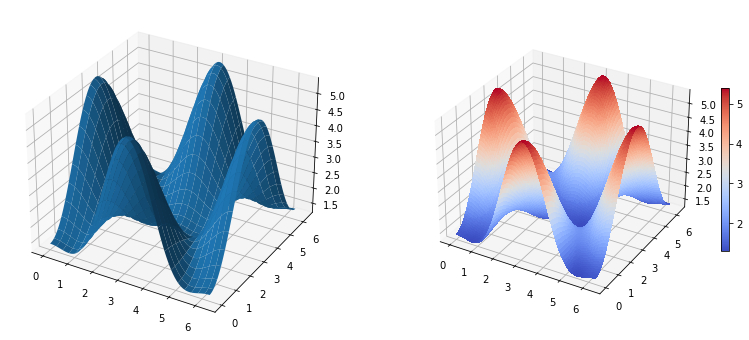

In [40]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

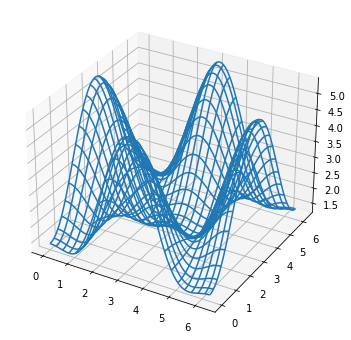

In [41]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

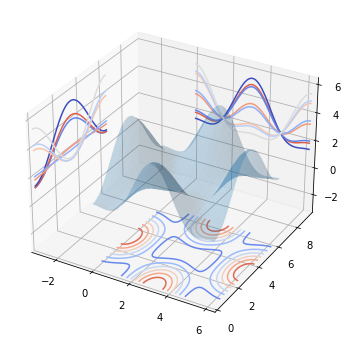

In [42]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

[look here for more things](https://matplotlib.org/)